In [104]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [105]:
import csv
o = open('laserdata.csv', 'rU')
mydata = csv.reader(o)

laseAngles2 = []
laserDepths = []
for row in mydata:
    laseAngles2.append(float(row[0]))
    laserDepths.append(float(row[1]))

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


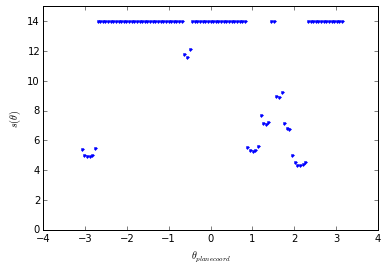

In [106]:
%pylab inline

plt.plot(laseAngles2,laserDepths,'.')
plt.xlabel(r'$\theta_{plane coord}$')
plt.ylabel(r'$s(\theta)$')
plt.axis([-4, 4, 0, 15])
plt.show()

In [107]:
# Approximation of linear combination of three Gaussians (separated by 2pi) over the range [-pi,pi]

from sympy.mpmath import *
I = [-math.pi, math.pi]
N = 22   # number of Fourier-approximation-of-3-Gaussian basis functions
M = 15    # order of Fourier series
sig = 0.1

In [108]:
cslist = []

for i in np.linspace(-3.14,3.14-3.14/11,N):
    print i

    f = lambda x: 2.71 ** (-(x-i)**2 / (2*sig**2)) + 2.71 ** (-(x-i-2*math.pi)**2 / (2*sig**2)) + 2.71 ** (-(x-i+2*math.pi)**2 / (2*sig**2))

    x = np.linspace(-10,10,1000)
    y = f(x) 
    cs = fourier(f, I, M)
    cslist.append(cs)

-3.14
-2.85454545455
-2.56909090909
-2.28363636364
-1.99818181818
-1.71272727273
-1.42727272727
-1.14181818182
-0.856363636364
-0.570909090909
-0.285454545455
0.0
0.285454545455
0.570909090909
0.856363636364
1.14181818182
1.42727272727
1.71272727273
1.99818181818
2.28363636364
2.56909090909
2.85454545455


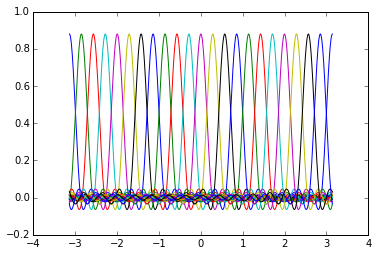

In [109]:
for i in range(len(cslist)):
    cs = cslist[i]
#print cs1
#print len(cs1)
#print len(cs1[0])
#print len(cs1[1])

    def f_basis_practice(x,M):
        b = math.pi
        a = -math.pi
        m = 2.0*math.pi / (b - a)
        y = 0
        for k in range(M+1):

            y = y + cs[0][k] * math.cos(k * m * x)
            y = y + cs[1][k] * math.sin(k * m * x)
        return y

    x = np.linspace(-math.pi,math.pi,1000)
    y = x * 0.0
    for i in range(len(x)):
        y[i] = f_basis_practice(x[i],M)

    plt.plot(x,y)
    
plt.show()

In [110]:
phi = np.zeros((100,N))
np.size(phi)
print phi.shape

(100, 22)


regression weights for N = 22
[  1.36430263e+01  -9.32061837e-01   8.42908466e+00   2.44061895e+01
  -3.59826738e+01  -8.24755806e+01   3.94678040e+01   9.53763132e+01
  -1.98440812e+01  -5.53861697e+01   5.31027177e+00   1.85970030e+01
  -7.84794903e-01  -3.83957981e+00   5.99387486e-02   4.95591753e-01
  -1.53261799e-03  -3.90138728e-02  -6.52719793e-05   1.71423529e-03
   3.53972732e-06  -3.22395314e-05]


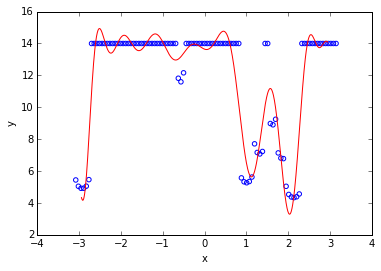

22
-0.0119502276145146
[[-0.0131228   0.01615042  0.00921744 ..., -0.00105091  0.01336306
  -0.00667509]
 [-0.01670321 -0.00078037  0.02588684 ..., -0.01125864  0.00979918
   0.00751474]
 [-0.00525272 -0.01858045  0.02003048 ..., -0.01169524 -0.00269162
   0.01563657]
 ..., 
 [ 0.01379293 -0.01202639 -0.01153318 ...,  0.00358983 -0.01300184
   0.00352736]
 [ 0.01397288  0.00433482 -0.02239589 ...,  0.01193    -0.00717217
  -0.00944309]
 [ 0.00147877  0.01796906 -0.01342058 ...,  0.00983456  0.00523815
  -0.01446316]]
regression weights for N = 22
[ 12.20135632   4.59715883  17.02995764  15.93085113  15.66954039
  15.95862956  16.13313022  15.70724037  16.0233995   14.20216177
  16.15552649  15.52745213  16.01296252  17.1258115   10.3708546
   5.39959105  12.78975374   9.9643205    4.41396582   9.58287235
  17.1625178   16.79410475]


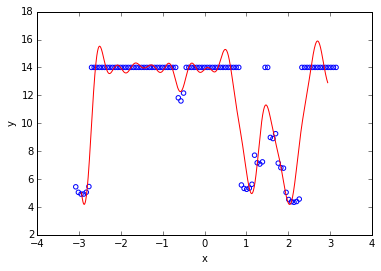

In [111]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
from linear_regression import LinearRegression
from gradient_descent import GradientDescent, quad, quadGrad
%matplotlib inline

def plot(lr,w):
    # plot sin(2*phi*x) in green
    x = np.linspace(-math.pi+0.2,math.pi-0.2,1000)
    lr_temp = LinearRegression(x,x,lr.numFeatures-1)
    reg_prediction = np.dot(lr_temp.phi,w)
    plt.plot(x, reg_prediction, color='r')
    plt.scatter(lr.x, lr.y, color='b', marker='o',facecolors='none')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()
    
def plotRBFbases(lr,w):
    # plot sin(2*phi*x) in green
    x = np.linspace(-math.pi+0.2,math.pi-0.2,1000)
    reg_prediction = lr.evalRBFbasis(w,x)
    plt.plot(x, reg_prediction, color='r')
    plt.scatter(lr.x, lr.y, color='b', marker='o',facecolors='none')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

lr = LinearRegression(laseAngles2,laserDepths,N-1)
w = lr.reg()
print "regression weights for N = " + str(N)
print w
plot(lr,w)

print len(cslist)

lr = LinearRegression(laseAngles2,laserDepths,N)
lr.setBases(N,M,cslist)
print lr.bases[0](0)
lr.RBF_Phi(N)
w = lr.reg()
print "regression weights for N = " + str(N)
print w
plotRBFbases(lr,w)




regression weights for N = 22
[  7.51591897e-02   1.73901912e-02  -1.40774032e-01  -3.13909875e-01
   5.47217474e-01   1.04304431e+00  -5.85372490e-01  -1.20075796e+00
   2.84612166e-01   6.90246333e-01  -7.19559708e-02  -2.28257507e-01
   9.52186398e-03   4.62553555e-02  -5.32581648e-04  -5.84703800e-03
  -1.09037540e-05   4.50111746e-04   2.64515061e-06  -1.93197834e-05
  -8.69219904e-08   3.54647065e-07]


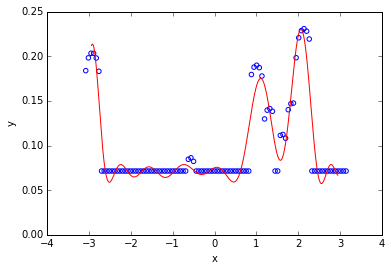

22
-0.0119502276145146
[[-0.0131228   0.01615042  0.00921744 ..., -0.00105091  0.01336306
  -0.00667509]
 [-0.01670321 -0.00078037  0.02588684 ..., -0.01125864  0.00979918
   0.00751474]
 [-0.00525272 -0.01858045  0.02003048 ..., -0.01169524 -0.00269162
   0.01563657]
 ..., 
 [ 0.01379293 -0.01202639 -0.01153318 ...,  0.00358983 -0.01300184
   0.00352736]
 [ 0.01397288  0.00433482 -0.02239589 ...,  0.01193    -0.00717217
  -0.00944309]
 [ 0.00147877  0.01796906 -0.01342058 ...,  0.00983456  0.00523815
  -0.01446316]]

In [ ]:
N = 22   # number of Fourier-approximation-of-3-Gaussian basis functions
M = 15    # order of Fourier series
sig = 0.1

laserDepths2 = np.array(laserDepths) * 0
for i in range(len(laserDepths)):
    laserDepths2[i] = 1.0/laserDepths[i]
    
lr = LinearRegression(laseAngles2,laserDepths2,N-1)
w = lr.reg()
print "regression weights for N = " + str(N)
print w
plot(lr,w)

print len(cslist)

lr = LinearRegression(laseAngles2,laserDepths2,N)
lr.setBases(N,M,cslist)
print lr.bases[0](0)
lr.RBF_Phi(N)
w = lr.reg()
print "regression weights for N = " + str(N)
print w
plotRBFbases(lr,w)



 
--- Minimization Summary --- 
x_min is = [  3.54764640e+158   2.38193123e+159   3.47835488e+159   2.26100267e+160
   3.41240634e+160   2.15085667e+161   3.34942710e+161   2.05015322e+162
   3.28910361e+162   1.95776307e+163   3.23117070e+163   1.87272792e+164
   3.17540245e+164   1.79422933e+165   3.12160509e+165   1.72156417e+166
   3.06961133e+166   1.65412508e+167   3.01927592e+167   1.59138471e+168
   2.97047201e+168   1.53288308e+169   2.92308827e+169   1.47821714e+170
   2.87702650e+170   1.42703232e+171   2.83219967e+171   1.37901546e+172
   2.78853033e+172   1.33388901e+173   2.74594925e+173   1.29140610e+174
   2.70439431e+174   1.25134647e+175   2.66380956e+175   1.21351304e+176
   2.62414444e+176   1.17772891e+177   2.58535305e+177   1.14383491e+178
   2.54739367e+178   1.11168743e+179]
f_min is = inf
achieved tolerance = nan
numFunctionCalls = 6
---------------------------- 
 


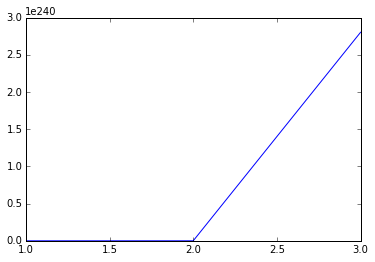

 
--- Scipy Minimization Summary --- 
x_min is = [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.]
f_min is = 15173.4776981
numFunctionCalls = 144
---------------------------- 
 
|w_gd - w_ols|^2 is
inf


AttributeError: LinearRegression instance has no attribute 'bases'

In [113]:
def gradDescentSSE():
    N = 40
    lr = LinearRegression(laseAngles2,laserDepths,41)
    #lr.setBases(N,cslist)
    #lr.RBF_Phi(N)
    w_initial = 0*np.zeros((1,42))[0]
    gd = GradientDescent(lr.SSE, lr.SSE_gradient)
    gd.stepSize = 0.025
    gd.tol = 1e-8
    (w, sse, _, _) = gd.computeMin(w_initial, printSummary=True, storeIterValues=True, useGradientCriterion=False, maxFunctionCalls=50000)
    gd.plotIterValues()
    
    res = opt.minimize(lr.SSE, w_initial)
    print " "
    print "--- Scipy Minimization Summary --- "
    print "x_min is = " + str(res.x)
    print "f_min is = " + str(res.fun)
    print "numFunctionCalls = " + str(res.nfev)
#     print "numIterations = " + str(res.nit)
    print "---------------------------- "
    print " "
    
    print "|w_gd - w_ols|^2 is"
    print np.linalg.norm(w - res.x)
    
    plotRBFbases(lr,w)
    plotRBFbases(lr,res.x)
    plt.show()
    
    
    return (lr, gd, w, sse)

(lr, gd, w, sse) = gradDescentSSE()